<a href="https://colab.research.google.com/github/emrefkrlr/DataScienceJourneyWithSampleProjects/blob/main/usedCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
vehicles_df = pd.read_csv('/content/originalData.csv')
copy_df = vehicles_df.copy()

In [3]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24198 entries, 0 to 24197
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        24198 non-null  int64  
 1   Year              24198 non-null  int64  
 2   Make              24198 non-null  object 
 3   Model             24198 non-null  object 
 4   Kilometres        23965 non-null  object 
 5   Body Type         22968 non-null  object 
 6    Engine           22136 non-null  object 
 7    Transmission     22854 non-null  object 
 8    Drivetrain       22967 non-null  object 
 9    Exterior Colour  23182 non-null  object 
 10   Interior Colour  16418 non-null  object 
 11   Passengers       12025 non-null  float64
 12   Doors            19611 non-null  object 
 13   Fuel Type        23464 non-null  object 
 14   City             17835 non-null  object 
 15   Highway          17835 non-null  object 
 16  Price             24198 non-null  int64 

In [4]:
vehicles_df.columns = vehicles_df.columns.str.replace("\n", "")
vehicles_df.columns = vehicles_df.columns.str.replace("\t", "")
vehicles_df.columns = vehicles_df.columns.str.strip()
vehicles_df.columns = vehicles_df.columns.str.lower()
vehicles_df.columns = vehicles_df.columns.str.replace(" ", "_")
vehicles_df.columns

Index(['unnamed:_0', 'year', 'make', 'model', 'kilometres', 'body_type',
       'engine', 'transmission', 'drivetrain', 'exterior_colour',
       'interior_colour', 'passengers', 'doors', 'fuel_type', 'city',
       'highway', 'price'],
      dtype='object')

In [5]:
vehicles_df.head()

,unnamed:_0,year,make,model,kilometres,body_type,engine,transmission,drivetrain,exterior_colour,interior_colour,passengers,doors,fuel_type,city,highway,price
0,0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2L/100km,9.0L - 9.5L/100km,43880
1,1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6L/100km,9.0L/100km,36486
2,2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0L/100km,8.6L/100km,40888
3,3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0L/100km,8.6L/100km,44599
4,4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3L/100km,9.1L/100km,46989


In [6]:
not_none_kilometers = vehicles_df.kilometres[vehicles_df.kilometres.notnull()]
kilometers = not_none_kilometers.str.split(" ", expand=True)
vehicles_df["n_kilometers"] = kilometers[0].astype("int64")

not_none_spent_city_per100 = vehicles_df.city[vehicles_df.city.notnull()]
spent_city_per100 = not_none_spent_city_per100.str.split("L", expand=True)
vehicles_df["n_city"] = spent_city_per100[0].astype("float64")


not_none_spent_highway_per100 = vehicles_df.highway[vehicles_df.highway.notnull()]
spent_highway_per100 = not_none_spent_highway_per100.str.split("L", expand=True)
vehicles_df["n_highway"] = spent_highway_per100[0].astype("float64")

In [7]:
vehicles_df["doors"].value_counts(sort=True)

4                     14313
2                      2907
4 doors                1004
5                       675
5 doors                 361
2 doors                 219
3                        89
3 doors                  39
Other/Donât Know        3
2.0                       1
Name: doors, dtype: int64

In [8]:
not_none_doors = vehicles_df.doors[vehicles_df.doors.notnull()]
doors = not_none_doors.str.replace(" doors", "")
doors = doors.str.replace("Other/Donât Know", "0")
vehicles_df["n_doors"] = doors.astype("float64")

In [9]:
vehicles_df = vehicles_df.drop(["unnamed:_0", "kilometres", "doors", "city", "highway"], axis=1)

In [11]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24198 entries, 0 to 24197
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24198 non-null  int64  
 1   make             24198 non-null  object 
 2   model            24198 non-null  object 
 3   body_type        22968 non-null  object 
 4   engine           22136 non-null  object 
 5   transmission     22854 non-null  object 
 6   drivetrain       22967 non-null  object 
 7   exterior_colour  23182 non-null  object 
 8   interior_colour  16418 non-null  object 
 9   passengers       12025 non-null  float64
 10  fuel_type        23464 non-null  object 
 11  price            24198 non-null  int64  
 12  n_kilometers     23965 non-null  float64
 13  n_city           17835 non-null  float64
 14  n_highway        17835 non-null  float64
 15  n_doors          19611 non-null  float64
dtypes: float64(5), int64(2), object(9)
memory usage: 3.0+ MB


In [15]:
vehicles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,24198.0,2018.263534,5.155973,1928.0,2016.0,2019.0,2022.0,2024.0
passengers,12025.0,5.097963,1.009955,2.0,5.0,5.0,5.0,15.0
price,24198.0,50071.237458,74622.723965,500.0,23685.0,36990.0,59980.0,3999998.0
n_kilometers,23965.0,69608.975005,73256.609552,0.0,7701.0,54223.0,108000.0,2470000.0
n_city,17835.0,11.238357,2.587753,2.3,9.3,11.1,12.8,39.2
n_highway,17835.0,8.431797,1.850046,2.6,7.2,8.4,9.5,42.8
n_doors,19611.0,3.726786,0.790565,0.0,4.0,4.0,4.0,5.0


<ipython-input-27-4296bf7ee8ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicles_df.price, hist=False)


<Axes: xlabel='price', ylabel='Density'>

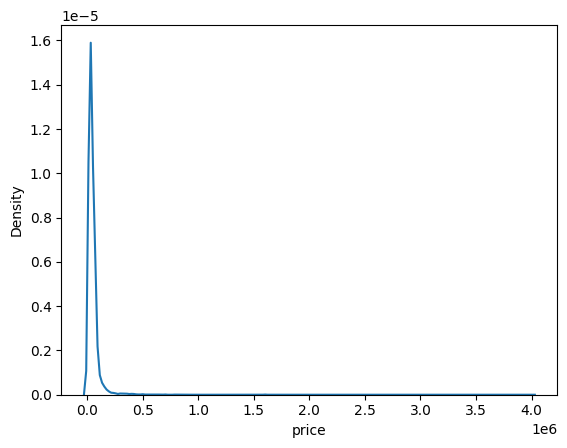

In [27]:
sns.distplot(vehicles_df.price, hist=False)

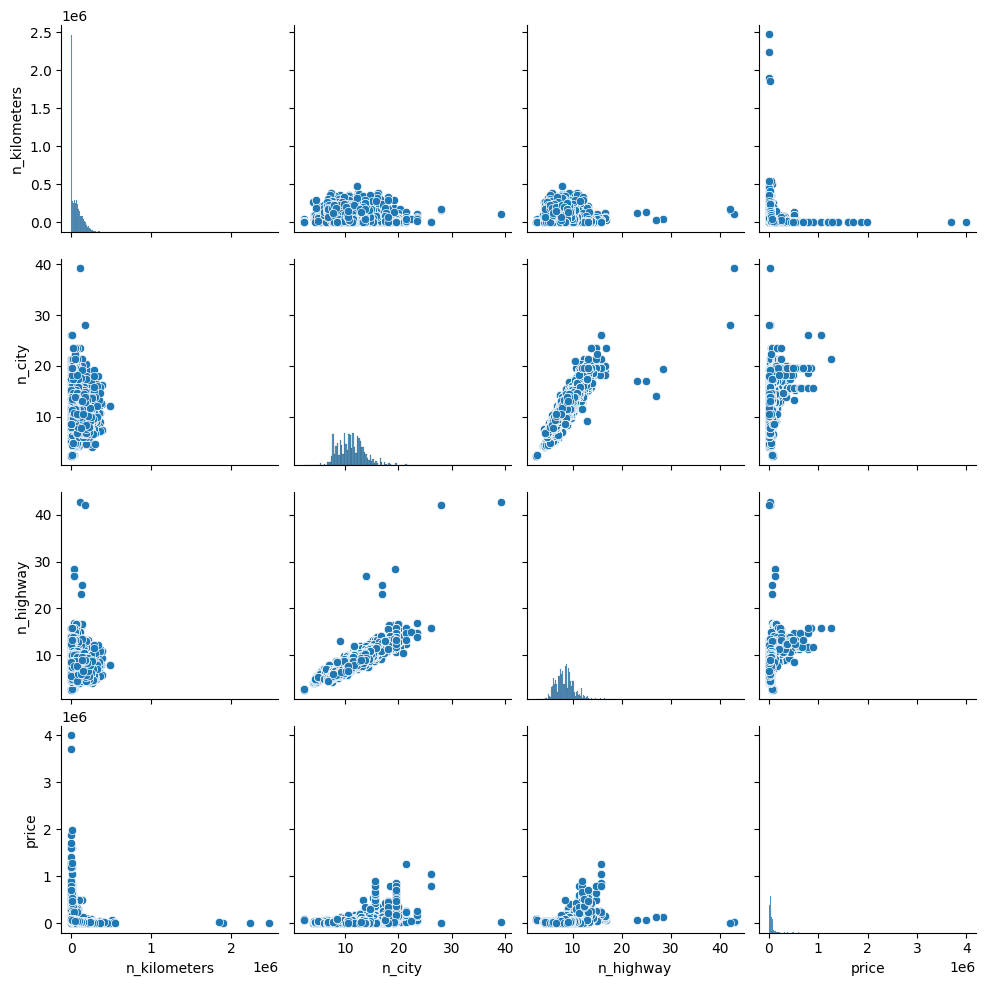

In [28]:
sns.pairplot(vehicles_df[["n_kilometers", "n_city", "n_highway", "price"]])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

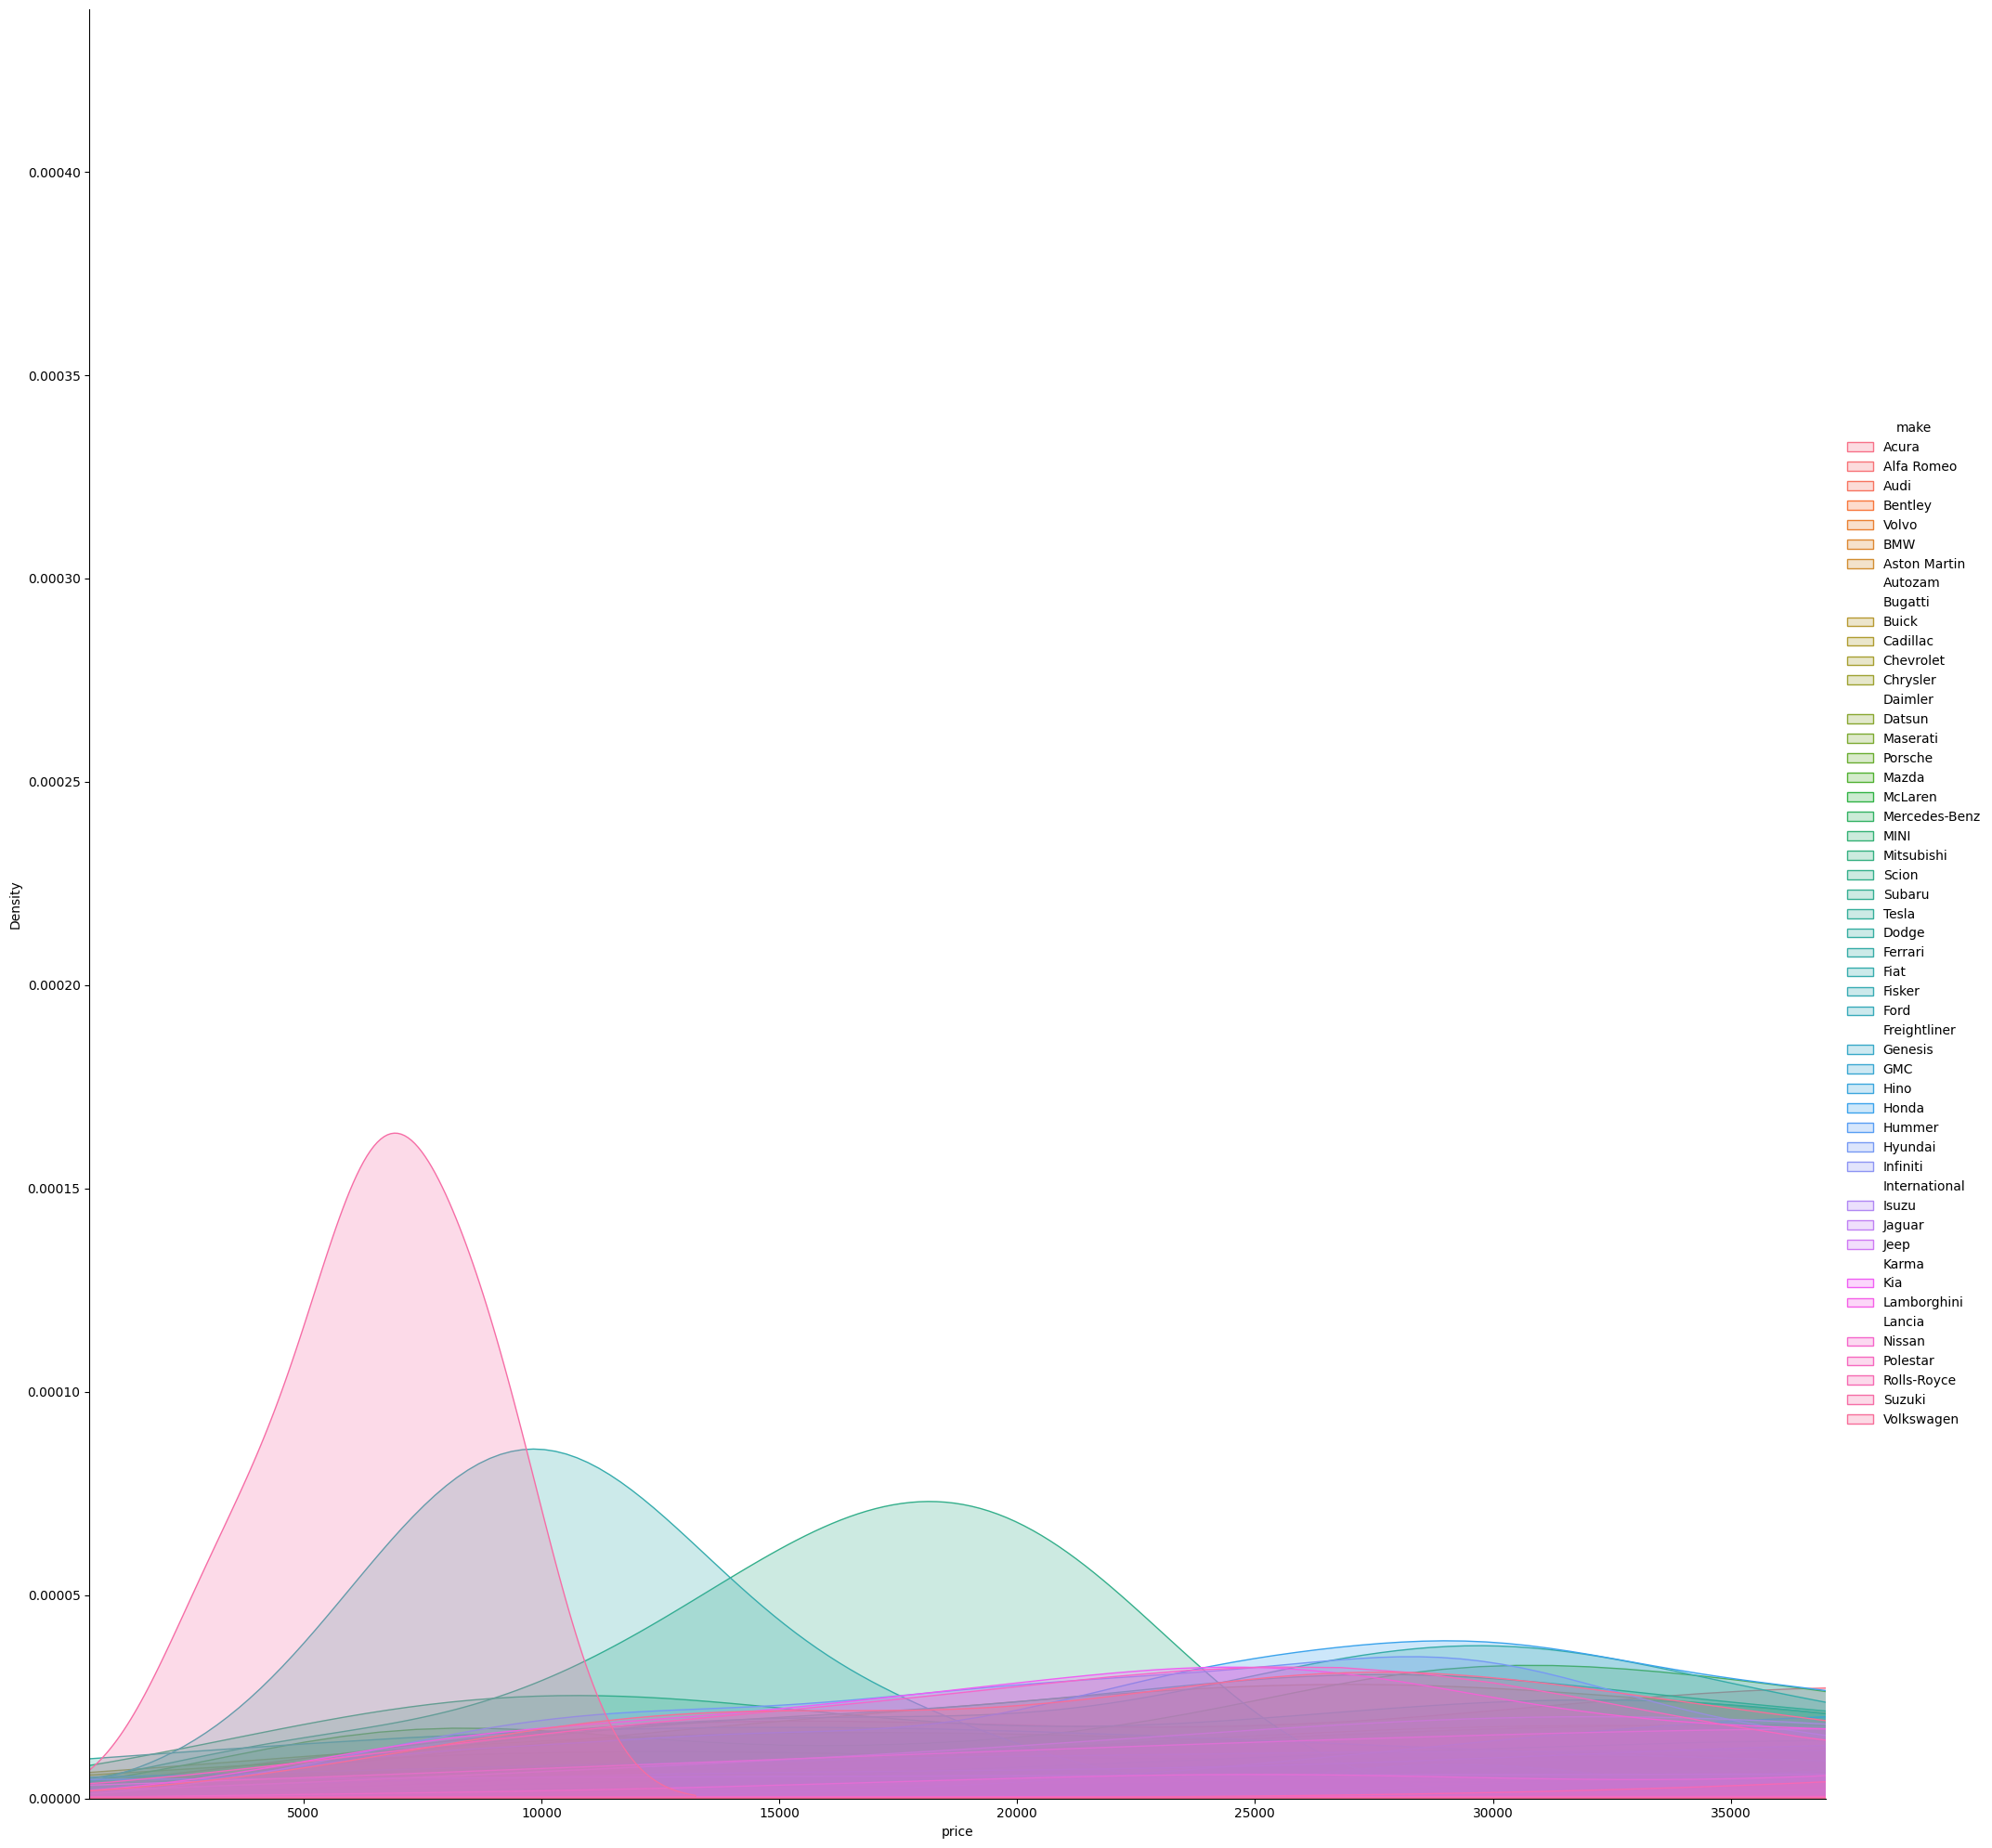

In [39]:
sns.FacetGrid(vehicles_df,
              hue="make",
              height=20,
              xlim = (500, 36990)).map(sns.kdeplot,
                                       "price",
                                       fill=True).add_legend()

<ipython-input-59-413026c4302b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicles_df.groupby(["make", "model"])["price"].count(), hist=True)


<Axes: xlabel='price', ylabel='Density'>

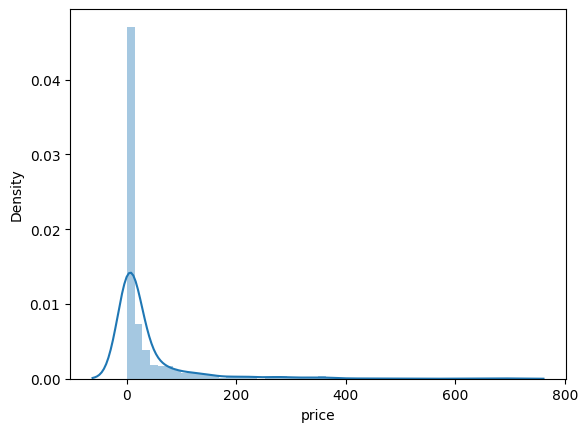

In [59]:
sns.distplot(vehicles_df.groupby(["make", "model"])["price"].count(), hist=True)

In [77]:
vehicles_df.groupby(["make", "model"])["price"].count().sort_values(ascending=True)

make           model   
Hyundai        Tiburon       1
Mercedes-Benz  GLA35         1
Jaguar         XJ6           1
Mercedes-Benz  GL350         1
Ferrari        456           1
                          ... 
Jeep           Grand       430
Hyundai        Elantra     492
Ford           F-150       613
Jeep           Wrangler    668
Honda          Civic       698
Name: price, Length: 695, dtype: int64

In [100]:
one_observation = vehicles_df.groupby(["make", "model"])["price"].count().sort_values(ascending=True) == 1
one_observation[one_observation == True]

make           model    
Hyundai        Tiburon      True
Mercedes-Benz  GLA35        True
Jaguar         XJ6          True
Mercedes-Benz  GL350        True
Ferrari        456          True
                            ... 
BMW            528I         True
Mercedes-Benz  SLK250       True
Ford           300          True
Infiniti       EX37         True
BMW            320xDrive    True
Name: price, Length: 160, dtype: bool

<ipython-input-135-2c65c0615f97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicles_df.groupby(["make", "model"])["price"].mean(), hist=True)


<Axes: xlabel='price', ylabel='Density'>

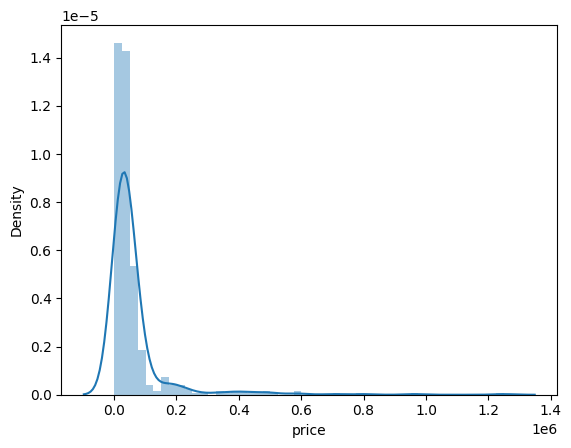

In [135]:
sns.distplot(vehicles_df.groupby(["make", "model"])["price"].mean(), hist=True)